##CNN_model(LeakyReLu ver)

used data : MNIST(28*28 Matrix = 784 pixel)

In [1]:
#import Library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from keras.layers import LeakyReLU

In [2]:
#load data & nomalize data
def load_mnist_dataset():
  (train_validation_images, train_validation_labels), (test_images, test_labels) \
    = mnist.load_data()

  train_validation_images = train_validation_images.reshape(-1,28,28,1)
  test_images = test_images.reshape(-1,28,28,1)

  train_validation_images = train_validation_images / 255.
  test_images = test_images / 255.

  n_train_validation = train_validation_images.shape[0]
  train_ratio = 0.8
  n_train = int(n_train_validation * train_ratio)

  train_x = train_validation_images[:n_train]
  train_y = train_validation_labels[:n_train]
  validation_x = train_validation_images[n_train:]
  validation_y = train_validation_labels[n_train:]
  test_x = test_images
  test_y = test_labels

#train set
  print('Image :', train_x.shape)
  print('Label :', train_y.shape)
#validtion set
  print('Image :', validation_x.shape)
  print('Label :', validation_y.shape)
#train&validation set
  print('Image :', test_x.shape)
  print('Label :', test_y.shape)

  return train_x, train_y, validation_x, validation_y, test_x, test_y

In [3]:
train_x, train_y, validation_x, validation_y, test_x, test_y = load_mnist_dataset()

11490434/11490434 [==============================] - 2s 0us/step
Image : (48000, 28, 28, 1)
Label : (48000,)
Image : (12000, 28, 28, 1)
Label : (12000,)
Image : (10000, 28, 28, 1)
Label : (10000,)


In [4]:
#build CNN model
model = Sequential()
model.add(Conv2D(filters=24, kernel_size=(3,3), padding='valid', activation='LeakyReLU'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=36, kernel_size=(3,3), padding='valid', activation='LeakyReLU'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='LeakyReLU'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [5]:
#train model
history = model.fit(train_x, train_y, batch_size=9, epochs=10,\
                    verbose=2, validation_data=(validation_x, validation_y))

Epoch 1/10
5334/5334 - 33s - loss: 0.1221 - accuracy: 0.9618 - val_loss: 0.0707 - val_accuracy: 0.9779 - 33s/epoch - 6ms/step
Epoch 2/10
5334/5334 - 19s - loss: 0.0519 - accuracy: 0.9838 - val_loss: 0.0548 - val_accuracy: 0.9829 - 19s/epoch - 4ms/step
Epoch 3/10
5334/5334 - 22s - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.0444 - val_accuracy: 0.9880 - 22s/epoch - 4ms/step
Epoch 4/10
5334/5334 - 18s - loss: 0.0295 - accuracy: 0.9906 - val_loss: 0.0493 - val_accuracy: 0.9850 - 18s/epoch - 3ms/step
Epoch 5/10
5334/5334 - 19s - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.0572 - val_accuracy: 0.9858 - 19s/epoch - 4ms/step
Epoch 6/10
5334/5334 - 18s - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.0481 - val_accuracy: 0.9874 - 18s/epoch - 3ms/step
Epoch 7/10
5334/5334 - 19s - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0560 - val_accuracy: 0.9872 - 19s/epoch - 4ms/step
Epoch 8/10
5334/5334 - 18s - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.0526 - val_accuracy: 0.9874 - 18s/epoch - 3

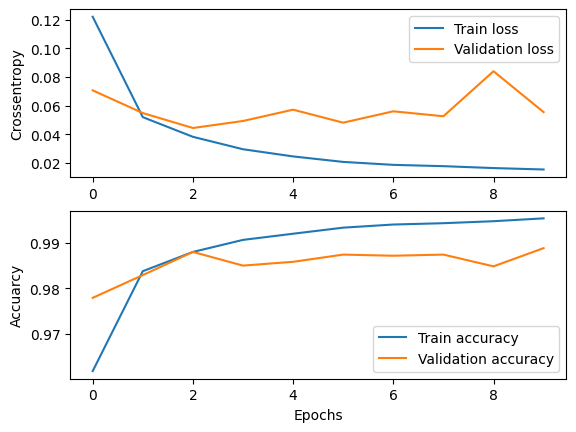

In [6]:
#Plot training loss and accuracy
fig, axes = plt.subplots(2,1)

axes[0].plot(history.history['loss'], label='Train loss')
axes[0].plot(history.history['val_loss'], label='Validation loss')
axes[0].set_ylabel('Crossentropy')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Train accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation accuracy')
axes[1].set_ylabel('Accuarcy')
axes[1].legend()
axes[1].set_xlabel('Epochs')

fig.show()

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 36)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 900)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [8]:
#test model
result= model.evaluate(test_x, test_y, verbose=2)

print('Test loss : {:.4f}\t Test accuracy : {:.2f}%'.format(result[0], result[1]*100))

313/313 - 1s - loss: 0.0423 - accuracy: 0.9897 - 794ms/epoch - 3ms/step
Test loss : 0.0423	 Test accuracy : 98.97%


313/313 [==============================] - 1s 2ms/step
Probabilty is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


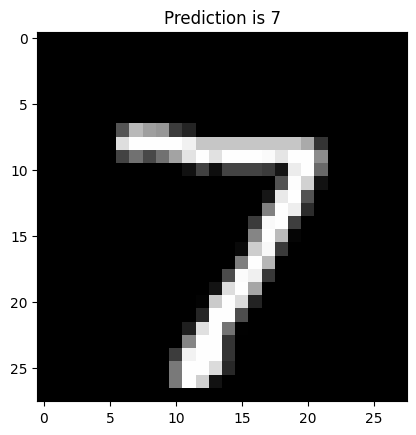

In [9]:
prediction = model.predict(test_x)
plt.imshow(test_x[0], 'gray')
print('Probabilty is {}'.format(prediction[0].round()))
plt.title('Prediction is {}'.format(np.argmax(prediction[0])))
plt.show()

In [10]:
layers=model.layers
print(layers)

[<keras.layers.convolutional.conv2d.Conv2D object at 0x7f2704bd16c0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f2704bd2c50>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7f2704bd2d40>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f2704bd2dd0>, <keras.layers.reshaping.flatten.Flatten object at 0x7f2704bd0040>, <keras.layers.core.dense.Dense object at 0x7f2704bd0070>, <keras.layers.core.dense.Dense object at 0x7f2704b8f9d0>]


In [11]:
layers[0].get_weights()[0]

array([[[[-0.2669709 ,  0.03588421,  0.14203629, -0.0893622 ,
           0.02372728, -0.11270512, -0.15125085,  0.02099695,
           0.02420891, -0.32809216,  0.00622579, -0.13545063,
          -0.04354986, -0.04274616, -0.15004084, -0.14269684,
           0.11847788,  0.04929068, -0.02352938, -0.11233114,
          -0.02234556,  0.23909509, -0.02514084,  0.03793518]],

        [[ 0.0907103 ,  0.11065211, -0.03455685, -0.00153208,
           0.19110462,  0.04004834, -0.17946625, -0.18177783,
          -0.03226587,  0.01978366,  0.02584267, -0.29988295,
          -0.07431828,  0.08531928,  0.0507028 ,  0.17920035,
          -0.25761086, -0.07751436,  0.02227094,  0.06525147,
          -0.22257966, -0.00305548, -0.12565953,  0.15016678]],

        [[ 0.06572497, -0.21242379, -0.33471575, -0.08545112,
           0.26433843, -0.00671443,  0.28439113, -0.02881273,
           0.1026929 ,  0.31877396, -0.08284175, -0.08300827,
          -0.25454286,  0.0529443 ,  0.16263878,  0.23386855,
  

In [12]:
#weight and bias
print('Con2D-1 : {} {}'.format(layers[0].get_weights()[0].shape,\
                               layers[0].get_weights()[1].shape))
print('trainable parameters : {}'.format(np.prod(layers[0].get_weights()[0].shape)\
                                         +np.sum(layers[0].get_weights()[1].shape)))
print('Con2D-2 : {} {}'.format(layers[2].get_weights()[0].shape,\
                               layers[2].get_weights()[1].shape))
print('trainable parameters : {}'.format(np.prod(layers[2].get_weights()[0].shape)\
                                         +np.sum(layers[2].get_weights()[1].shape)))
print('Dense-1 : {} {}'.format(layers[5].get_weights()[0].shape,\
                               layers[5].get_weights()[1].shape))
print('trainable parameters : {}'.format(np.prod(layers[5].get_weights()[0].shape)\
                                         +np.sum(layers[5].get_weights()[1].shape)))
print('Dense-2 : {} {}'.format(layers[6].get_weights()[0].shape,\
                               model.layers[6].get_weights()[1].shape))
print('trainable parameters : {}'.format(np.prod(layers[6].get_weights()[0].shape)\
                                         +np.sum(layers[6].get_weights()[1].shape)))

Con2D-1 : (3, 3, 1, 24) (24,)
trainable parameters : 240
Con2D-2 : (3, 3, 24, 36) (36,)
trainable parameters : 7812
Dense-1 : (900, 128) (128,)
trainable parameters : 115328
Dense-2 : (128, 10) (10,)
trainable parameters : 1290


In [13]:
x = tf.random.uniform(shape=(1,28,28,1))
for layer in model.layers:
    x=layer(x)
    print(layer.__class__.__name__, 'output shape:\t',x.shape)

Conv2D output shape:	 (1, 26, 26, 24)
MaxPooling2D output shape:	 (1, 13, 13, 24)
Conv2D output shape:	 (1, 11, 11, 36)
MaxPooling2D output shape:	 (1, 5, 5, 36)
Flatten output shape:	 (1, 900)
Dense output shape:	 (1, 128)
Dense output shape:	 (1, 10)
